In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# retina
%config InlineBackend.figure_format = 'retina'

In [2]:
# read ow_rsq_table, afs_rsq_table, ow_summary, afs_summary
with open("./impact_model_summary/ow_rsq_table.pkl", 'rb') as f:
    ow_rsq_table = pickle.load(f)
with open("./impact_model_summary/ow_summary.pkl", 'rb') as f:
    ow_summary = pickle.load(f)    
with open("./impact_model_summary/afs_rsq_table.pkl", 'rb') as f:
    afs_rsq_table = pickle.load(f)
with open("./impact_model_summary/afs_summary.pkl", 'rb') as f:
    afs_summary = pickle.load(f)

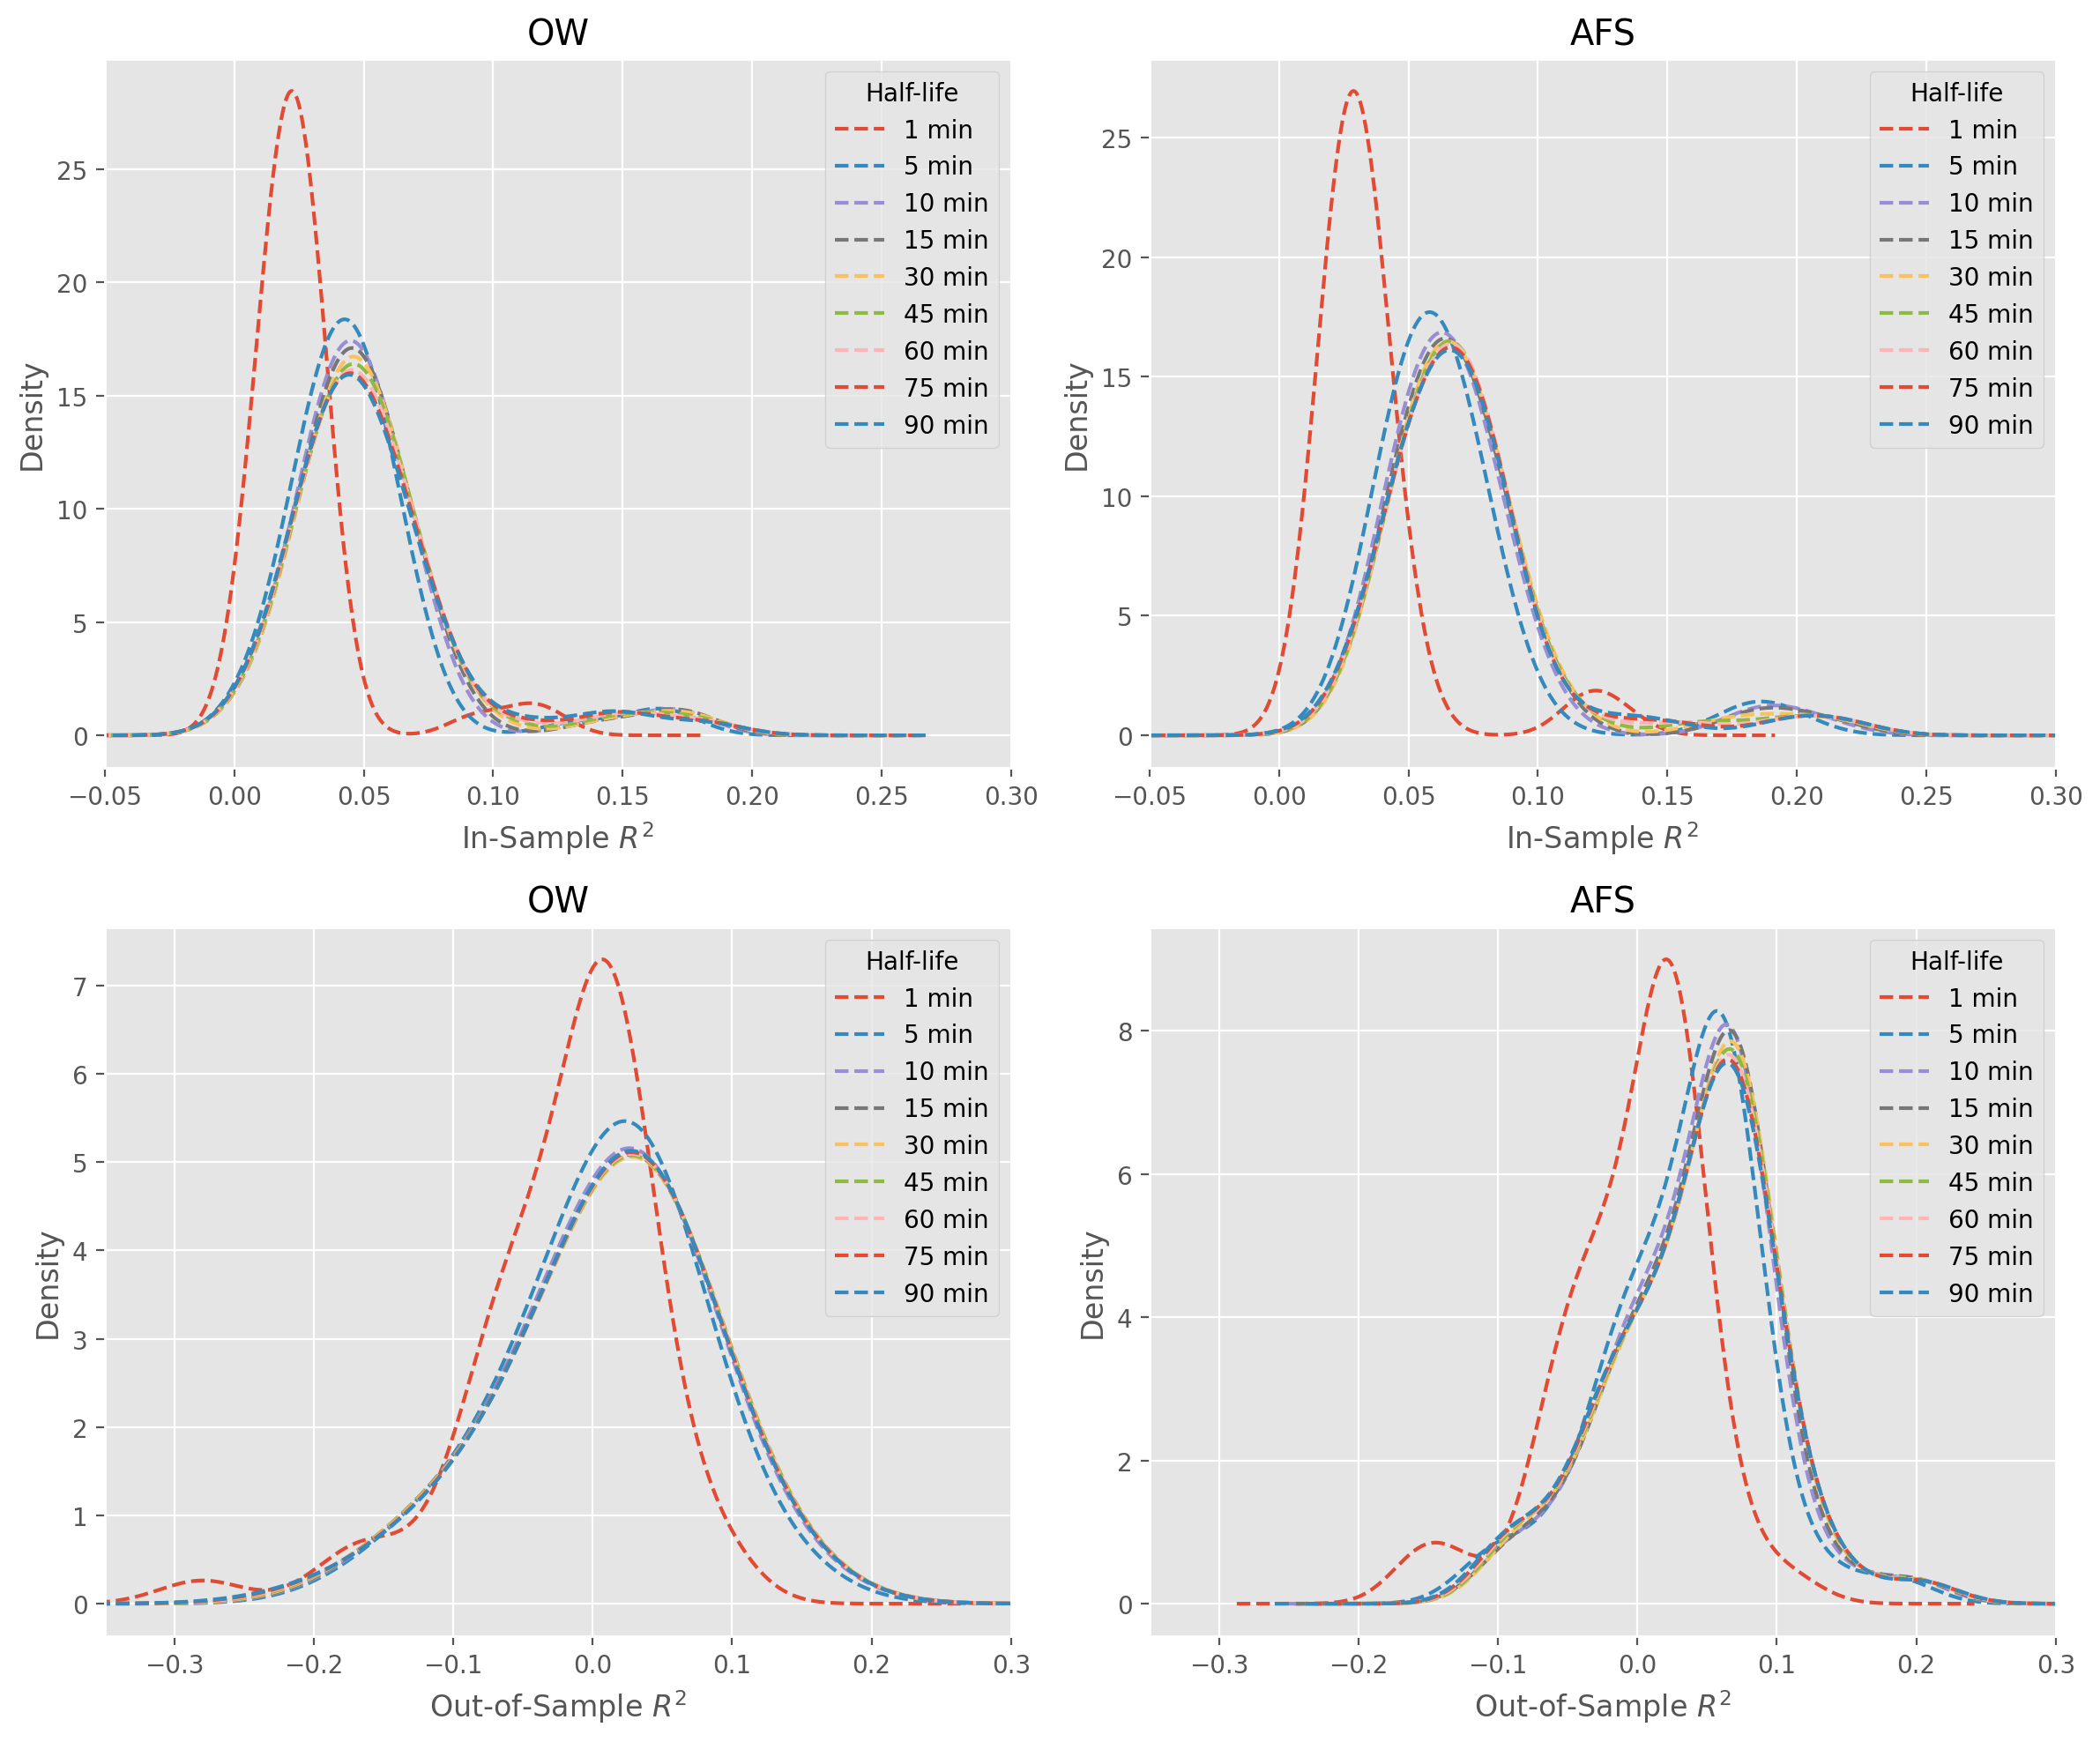

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
xlim = (0, 0.3)
# ow
rsq_table = ow_rsq_table
half_life_list = rsq_table['half_life'].unique()
for i in range(len(half_life_list)):
    half_life = half_life_list[i]
    is_rsq = rsq_table[rsq_table['half_life'] == half_life]['is_rsq']
    oos_rsq = rsq_table[rsq_table['half_life'] == half_life]['oos_rsq']
    is_rsq.plot.kde(ls='--', xlim=(-0.05, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[0,0])
    oos_rsq.plot.kde(ls='--', xlim=(-0.35, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[1,0])
ax[0,0].set_xlabel('In-Sample $R^2$')
ax[0,0].legend(title='Half-life')
ax[0,0].set_title('OW')
ax[1,0].set_xlabel('Out-of-Sample $R^2$')
ax[1,0].legend(title='Half-life')
ax[1,0].set_title('OW')
# afs
rsq_table = afs_rsq_table
half_life_list = rsq_table['half_life'].unique()
for i in range(len(half_life_list)):
    half_life = half_life_list[i]
    is_rsq = rsq_table[rsq_table['half_life'] == half_life]['is_rsq']
    oos_rsq = rsq_table[rsq_table['half_life'] == half_life]['oos_rsq']
    is_rsq.plot.kde(ls='--', xlim=(-0.05, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[0,1])
    oos_rsq.plot.kde(ls='--', xlim=(-0.35, 0.3), lw=1.5, label=f'{half_life/60:.0f} min', ax=ax[1,1])
ax[0,1].set_xlabel('In-Sample $R^2$')
ax[0,1].legend(title='Half-life')
ax[0,1].set_title('AFS')
ax[1,1].set_xlabel('Out-of-Sample $R^2$')
ax[1,1].legend(title='Half-life')
ax[1,1].set_title('AFS')
plt.tight_layout()
plt.savefig('./Plots/ow_afs_rsq.png', dpi=250)
    
